In [67]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

In [68]:
# importing data
df = pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0305-credit-risk-modelling---classification-Lilian-Wamuhu/main/raw-data.csv?token=GHSAT0AAAAAACB6WMSWGAEL4EMJQEXAQ3PKZCM5UPQ")
df.head()

<ipython-input-68-d125cf5f58af>:2: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0305-credit-risk-modelling---classification-Lilian-Wamuhu/main/raw-data.csv?token=GHSAT0AAAAAACB6WMSWGAEL4EMJQEXAQ3PKZCM5UPQ")


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [69]:
# Checking for duplicates and our data has no duplicates
df.duplicated().sum()

0

# **Data Pre-processing**

In [70]:
#Renaming columns in the dataset with their correct names
loan = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [71]:
# Dimension of the dataset
loan.shape

(119528, 32)

In [72]:
# Checking the data
loan.dtypes

Customer ID                                                         int64
Customer has bounced in first EMI                                   int64
No of times bounced 12 months                                       int64
Maximum MOB                                                       float64
No of times bounced while repaying the loan                       float64
EMI                                                               float64
Loan Amount                                                       float64
Tenure                                                            float64
Dealer codes from where customer has purchased the Two wheeler    float64
Product code of Two wheeler                                        object
No of advance EMI paid                                            float64
Rate of interest                                                  float64
Gender                                                             object
Employment type                       

In [73]:
# Data distribution
loan.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [74]:
# Data information
# As illustrated there are quite a number of features with missing values.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

**Handling Missing Values**

In [75]:
missing_data = loan.isnull().sum().sort_values(ascending = False)
missing_data.head(20)
     

Time since last Personal loan taken (in months)                   106097
Total sanctioned amount in the unsecured Loans which are Live     100500
Total sanctioned amount in the secured Loans which are Live       100247
Time since first consumer durables loan taken (in months)          99095
Max amount sanctioned in the Live loans                            82902
Resident type of customer                                          35397
No of advance EMI paid                                             34480
Date of birth                                                      34480
Employment type                                                    34480
Rate of interest                                                   34480
Customer age when loan was taken                                   34480
Product code of Two wheeler                                        34480
Dealer codes from where customer has purchased the Two wheeler     34480
Tenure                                             

In [76]:
loan.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)
missing_data = loan.isnull().sum().sort_values(ascending = False)


In [77]:
dropped=['Resident type of customer', 'Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

loan.drop(dropped,axis=1,inplace=True)

In [78]:
loan.isnull().sum().sort_values(ascending=False)

Customer ID                                                       0
Employment type                                                   0
Tier                                                              0
No of times 90 days past due in last 3 months                     0
No of times 60 days past due in last 6 months                     0
No of times 30 days past due in last 6 months                     0
No of new loans in last 3 months                                  0
No of unsecured loans                                             0
No of secured loans                                               0
No of loans                                                       0
Customer age when loan was taken                                  0
Date of birth                                                     0
Gender                                                            0
Customer has bounced in first EMI                                 0
Rate of interest                                

In [79]:
loan.shape

(85048, 25)

**Correlation Matrix**

<ipython-input-80-064ce85f0b8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan.corr()


<Axes: >

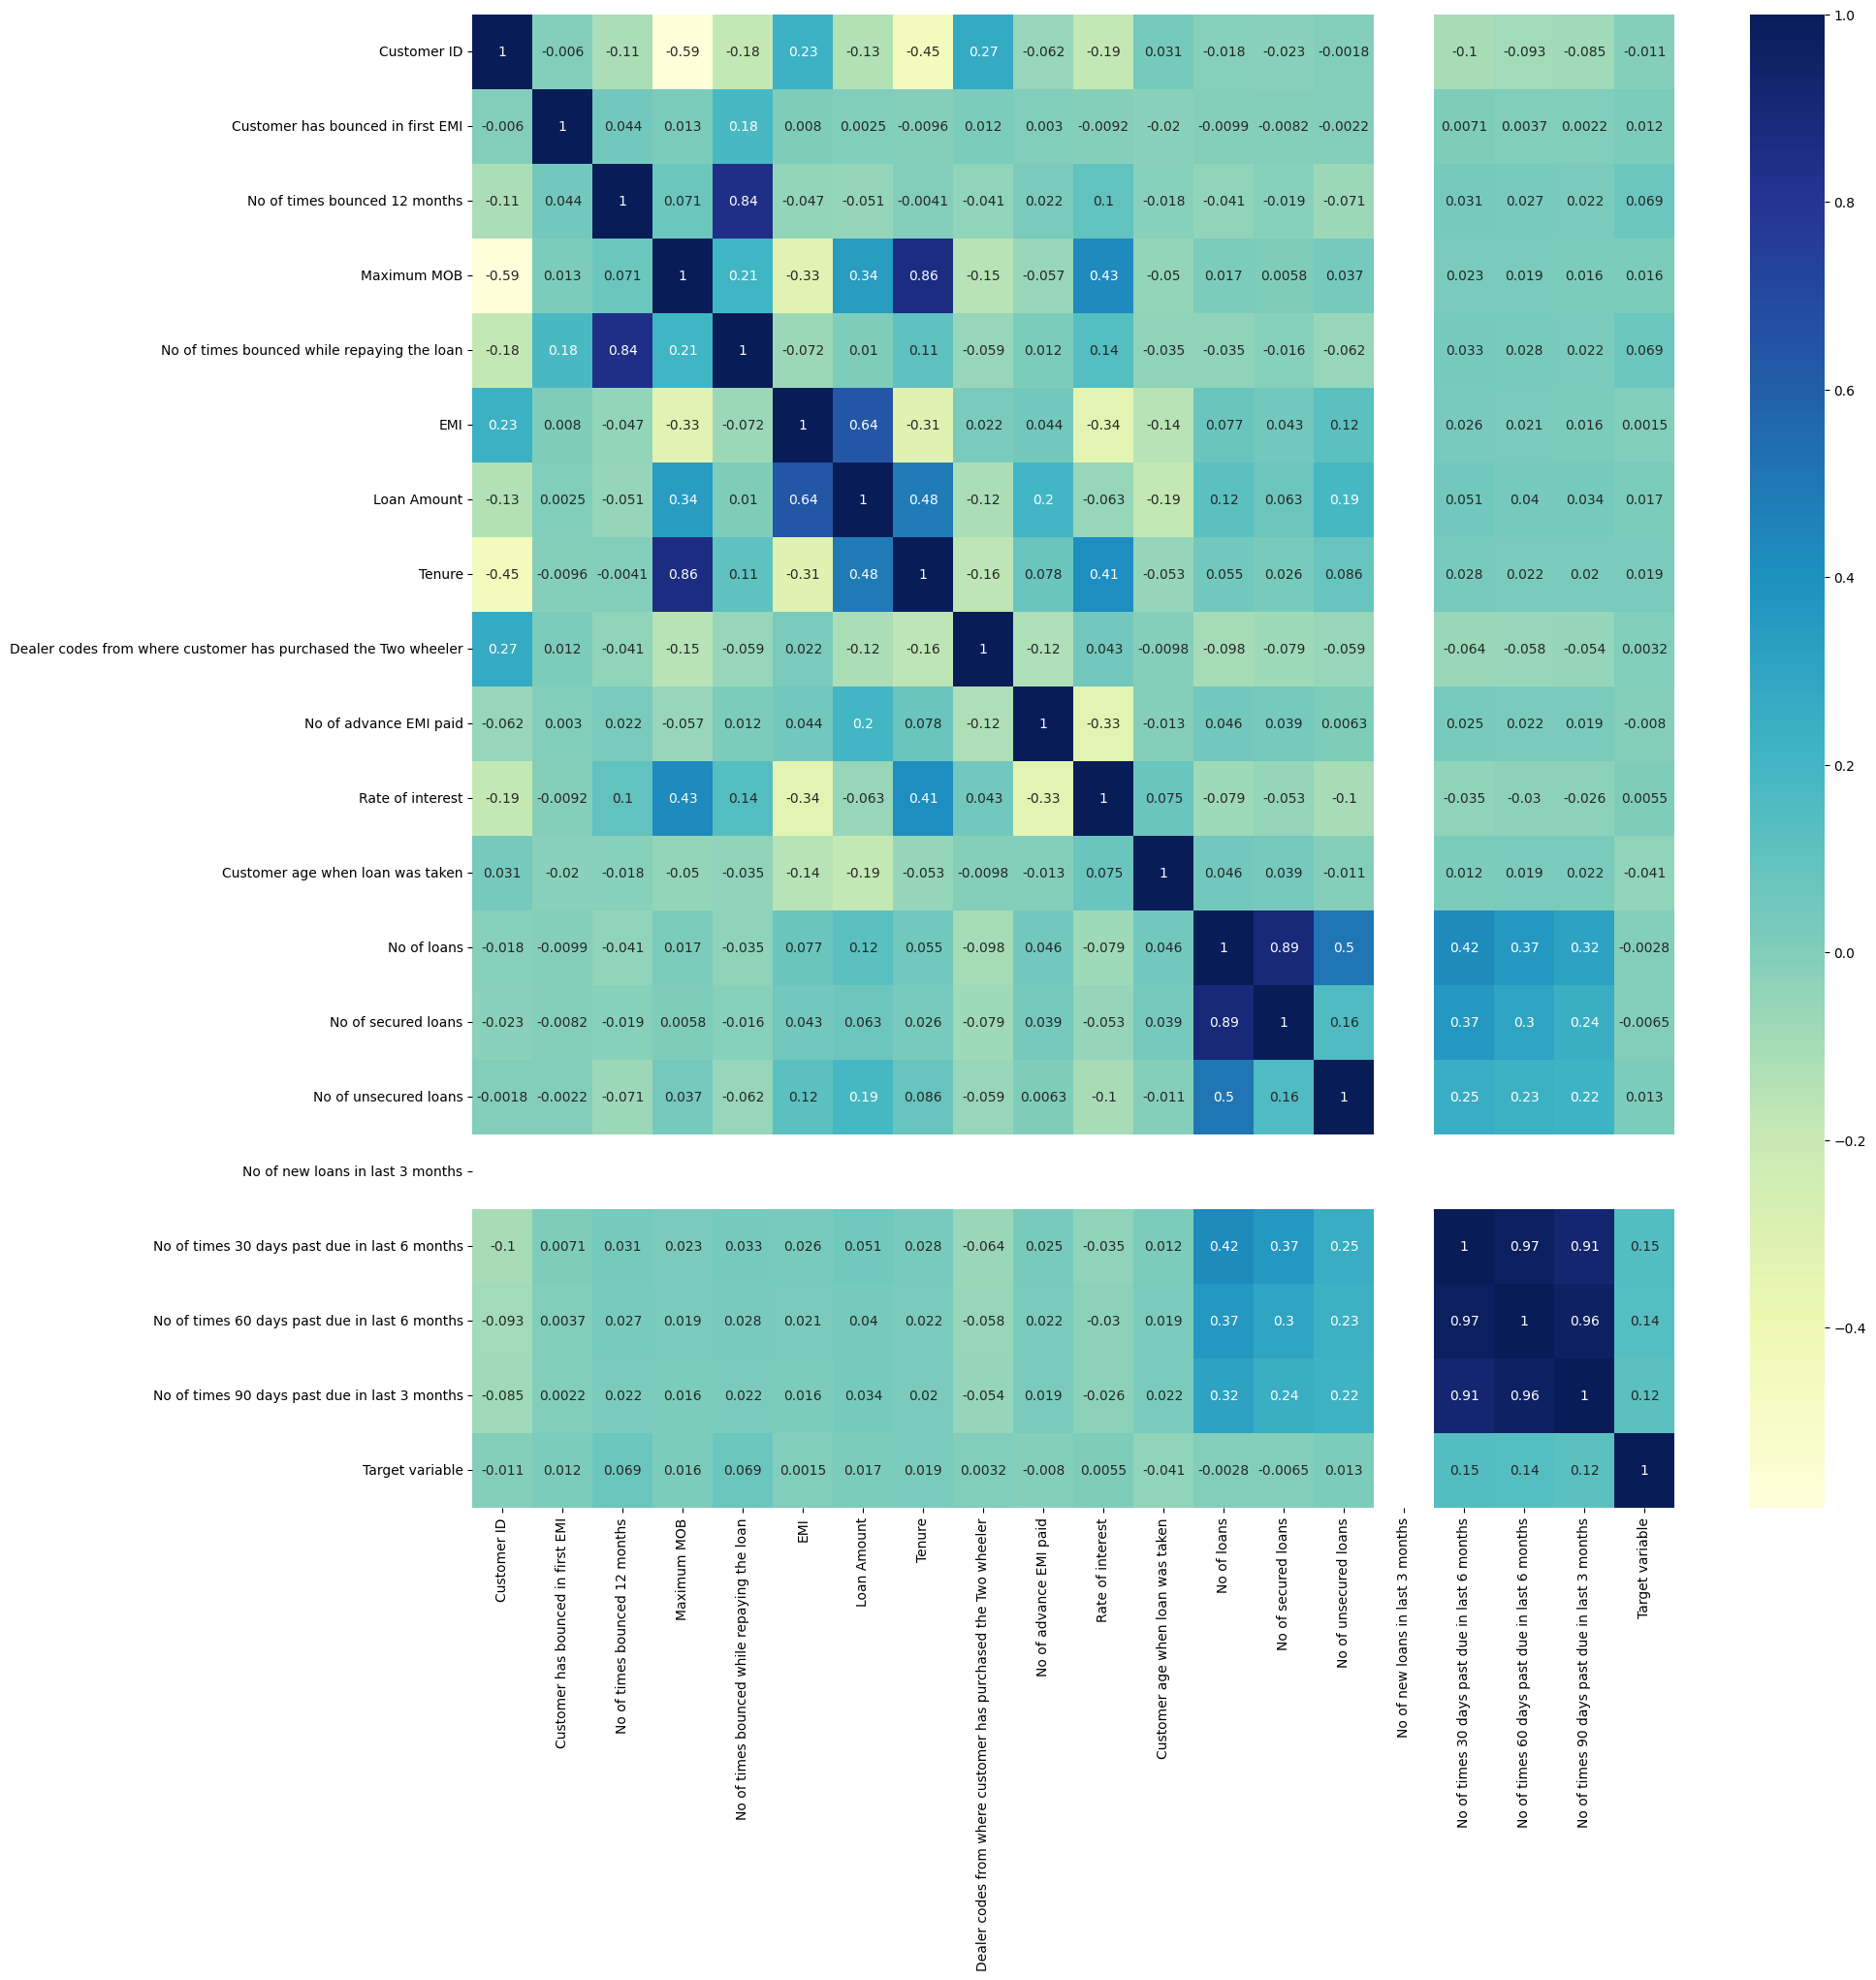

In [80]:
corr_matrix = loan.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(loan[top_corr_features].corr(),annot=True,cmap="YlGnBu")

Overall, the heatmap provides a quick and intuitive way to see which variables in the dataset are highly correlated with each other. Correlation coefficients range from -1 to 1, with values closer to 1 indicating a strong positive correlation, values closer to -1 indicating a strong negative correlation, and values close to 0 indicating no correlation. The heatmap color-codes the cells based on the magnitude of the correlation coefficients, with darker colors indicating higher absolute values. The diagonal cells of the heatmap are all colored in dark blue, indicating perfect correlation between each variable with itself. By examining the off-diagonal cells, one can quickly identify pairs of variables that are highly positively or negatively correlated, which can provide insights for further analysis or modeling.

**Gender Ration**

In [81]:
gender_counts = loan['Gender'].value_counts()

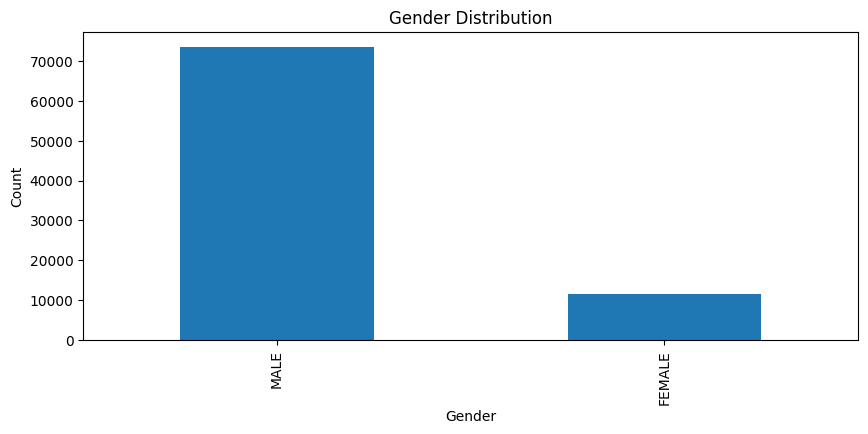

In [82]:
# Plotting the bar graph
gender_counts.plot(kind='bar',figsize = (10,4))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

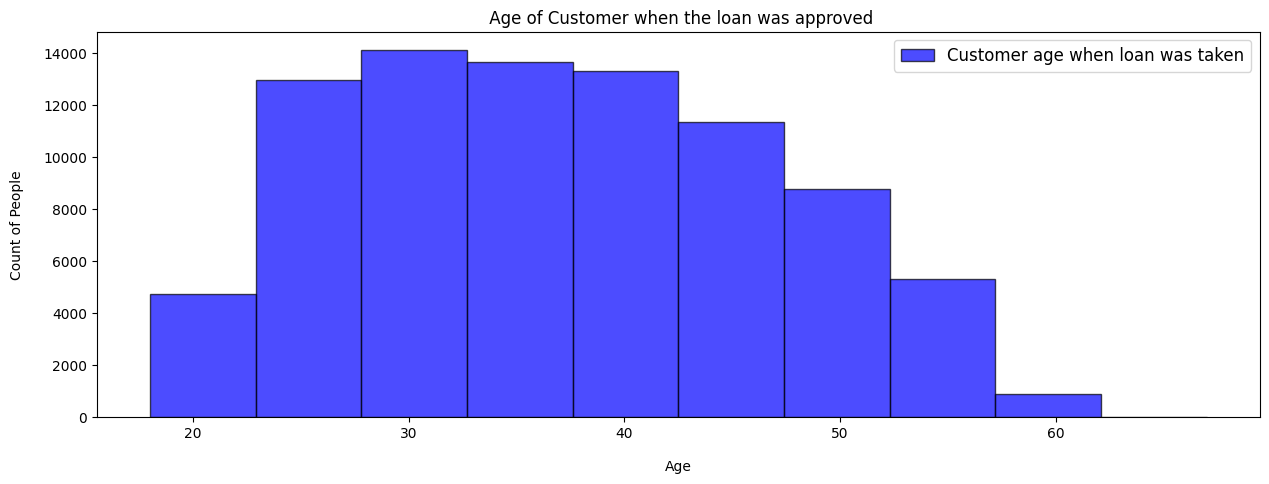

In [83]:
# Plotting against age at which customers took loans
plt.figure(figsize=(15,5))

#bar plot
loan['Customer age when loan was taken'].plot(kind='hist',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

From the histogram, we can see that the majority of customers took out loans in their mid-20s to mid-50s, with the peak around age 30. The number of customers taking out loans then decreases as age increases, with a relatively small number of customers taking out loans beyond age 60.

# **Encoding**

Encoding refers to the process of converting categorical or text data into a numerical representation that can be processed by a machine learning algorithm. Categorical data are data that describe categories or groups, such as color, gender, or city of residence, while text data are data that represent natural language, such as words or sentences.

There are several methods for encoding categorical or text data, including:

One-Hot Encoding: This method converts each category into a binary vector with a value of 1 for the category and 0 for all other categories. This results in a sparse matrix that can be used as input to a machine learning model.

Label Encoding: This method assigns a unique integer value to each category, which can be used as input to a machine learning model. However, this method can introduce an ordering bias if the categories are not ordinal.

The importance of encoding lies in the fact that machine learning algorithms typically work with numerical data, and therefore categorical or text data must be converted into numerical representations that can be processed by the algorithm.

**Label Encoding**

We can use LabelEncoder to encode our variable to numbers. What a label encoder essentially does is that it sees the first value in the column and converts it to 0, next value to 1 and so on.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. This approach works reasonably well with tree models

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [85]:
CatVariables = loan.select_dtypes(include=['object'])
for feature in CatVariables:
    loan[feature] = le.fit_transform(loan[feature].astype(str))

In [86]:
loan["Target variable"].value_counts()

0    83194
1     1854
Name: Target variable, dtype: int64

0 -->Non-Defaulters

1 -->Defaulters

The data set is pretty imbalanced as expected where positive examples defualters are significanltly less than 25%. 

# **Model Classification**

This is a task in machine learning where a model is trained to predict the class or category of an input based on some set of features or attributes. The goal of classification is to learn a function that maps input features to output classes.

Different types of model classification:

Logistic Regression: a linear model that is used to predict the probability of an input belonging to a particular class.

Decision Trees: a tree-based model that recursively splits the input space based on the values of the input features.

Random Forest: an ensemble model that combines multiple decision trees to improve prediction accuracy.

Support Vector Machines (SVMs): a model that finds the best hyperplane to separate the input space into different classes.

Naive Bayes: a probabilistic model that assumes that the input features are conditionally independent given the class.

Neural Networks: a flexible and powerful model that can learn complex non-linear mappings between input features and output classes.



**Random Forest**

This is a model that is used for classification, regression, and other tasks. It is an ensemble model that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

The basic idea behind Random Forest is to build a large number of decision trees, each based on a randomly sampled subset of the training data and a randomly sampled subset of the input features. Each decision tree in the forest makes a prediction, and the final prediction is based on a majority vote or average of the predictions from all the trees in the forest.

Random Forest has several advantages over individual decision trees, such as:

Improved accuracy: Random Forest can improve prediction accuracy by reducing the impact of individual decision trees that may overfit the data or make errors.

Reduced overfitting: By randomly sampling subsets of the training data and input features, Random Forest reduces the risk of overfitting to the training data.

Feature importance: Random Forest can provide information on the importance of each input feature in the prediction, which can be useful for feature selection and interpretation.

Non-linear relationships: Random Forest can capture non-linear relationships between input features and the output, making it useful for complex datasets.

In [87]:
X=loan.drop(['Customer ID','Target variable'],axis=1)
y=loan[["Target variable"]]

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your train accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')

<ipython-input-88-bcc4eaf5f303>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Your train accuracy is: 0.9783264746227709
Your prediction is: 0.9781465741689483


In [89]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.967608433921731

array([[<Axes: title={'center': 'Target variable'}>]], dtype=object)

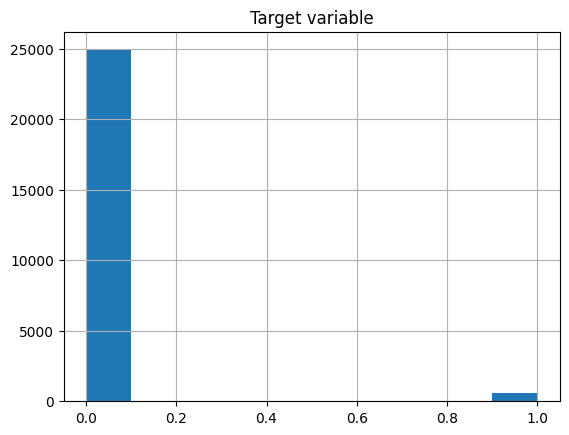

In [90]:
y_test.hist()

Clearly, the model has not leant enough examples of the default class, thus the predictions are for the non-defualters, and given their numbers, any complete prediction of the non-default class will give a misleading value of the perfomance metric

# **Class Imbalance**

This is where the distribution of classes in the dataset is not uniform. That is, one class has significantly fewer instances than the other class.

Imbalanced data can pose several challenges in machine learning, including:

*   Bias in model performance: Since the model is trained on a biased dataset, it 
may develop a bias towards the majority class and perform poorly on the minority class. This can lead to low accuracy, precision, and recall for the minority class.
*  Difficulty in learning the minority class: Since there are fewer instances of the minority class, the model may have difficulty learning the characteristics of that class and may struggle to generalize to new instances.

*   Overfitting: If the model is not properly regularized, it may overfit to the majority class and fail to generalize well to new instances.


Balancing the class distribution is an important step in machine learning when dealing with imbalanced datasets. It can lead to improved performance, reduced bias, better representation, and better generalization of the model to new instances.






# **Dealing with class imbalance**

Some common techniques for handling imbalanced data include:


1.   Resampling: This involves either oversampling the minority class by replicating instances or undersampling the majority class by removing instances to balance the class distribution.
2.  Synthetic data generation: This involves generating synthetic instances of the minority class to augment the dataset and improve the representation of that class.


3.   Cost-sensitive learning: This involves modifying the learning algorithm to penalize misclassifications of the minority class more heavily than misclassifications of the majority class.
4.   Ensemble learning: This involves combining multiple models to improve the overall performance and handle the imbalanced data.

**SMOTE**

S𝒚𝒏𝒕𝒉𝒆𝒕𝒊𝒄 𝒎𝒊𝒏𝒐𝒓𝒊𝒕𝒚 𝒐𝒗𝒆𝒓𝒔𝒂𝒎𝒑𝒍𝒊𝒏𝒈 𝒕𝒆𝒄𝒉𝒏𝒊𝒒𝒖𝒆- creates examples of the minority class by looking at the distribution of the minority class and "guesses" what the other cases would have been. 

The reason why SMOTE is effective in handling imbalanced data is that it addresses the issue of overfitting that can occur with traditional oversampling techniques. It can help to improve the diversity of the minority class instances. It also helps to address the issue of class imbalance by balancing the class distribution while avoiding the loss of information that can occur with traditional undersampling techniques. This leads to improved performance and better generalization of the model to new instances.

In [91]:
from imblearn.over_sampling import SMOTE

array([[<Axes: title={'center': 'Target variable'}>]], dtype=object)

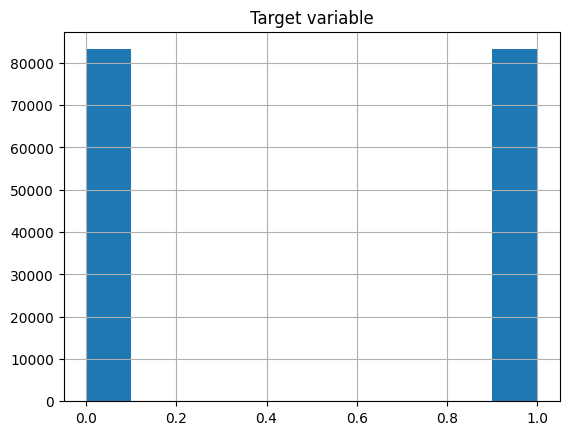

In [92]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote_sample=SMOTE(random_state=124,sampling_strategy='auto') # the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

With SMOTE we get a feature space with a similar distribution to the original data set, except that in this case we actually have a balanced ratio of the negative and positive examples. Thus our model should be able to learn the patterns associated with both defaults and non-defaults. Here we are interested in both an increase in precision and recall.



# **Balanced data**

In [93]:
from sklearn.ensemble import RandomForestClassifier 
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.3, random_state = 10)
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your test accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')

# If you choose class_weight = "balanced", the classes will be weighted inversely proportional to how frequently
#  they appear in the data.

<ipython-input-93-d93a99d7158d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Your test accuracy is: 0.8239677865256325
Your prediction is: 0.823234968361223


# **MODEL VALIDATON**

Model validation is an important step in machine learning to ensure that the model accurately generalizes to new data. The process of model validation involves assessing the performance of a model on a set of data that was not used to train the model. This can help identify any issues or limitations with the model, and can guide improvements or adjustments to the model.

There are several techniques for model validation, including:

Holdout validation: This involves splitting the data into two sets - one for training the model and one for testing the model. The model is trained on the training set, and then evaluated on the test set. This technique is simple and efficient, but may not be representative if the data is imbalanced or if the test set is too small.

Cross-validation: This involves dividing the data into multiple subsets or folds, training the model on each subset, and then evaluating the model on the remaining data. This technique can provide a more accurate assessment of the model's performance, especially with smaller datasets, but can be computationally expensive.

Bootstrapping: This involves resampling the data with replacement to create multiple training and testing sets. The model is trained on each set, and the results are averaged to provide an estimate of the model's performance. This technique is useful when there is limited data available.

In [94]:
# performing the Holdout validation
y_hat=model.predict(x_test)
y_hat_2=(model.predict_proba(x_test)[:,1]>0.3).astype(int)
# It is worth noting that one can vary the threshold for default given the lending facility's risk appetite. The threshold can be adjusted to suit the specific needs of the problem or the business requirements.


print(f1_score(y_test,y_hat),f1_score(y_test,y_hat_2))

0.817716004563842 0.8134482584807702


In [95]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y_test,y_hat),recall_score(y_test,y_hat_2))


0.7906053191062618 0.9710377472020538


The following forms our basis for rank ordering
0 - 200 Bad Customer ,

201-350 2nd Worst,

351 - 500 Not So bad,

501 - 700 Ideal guys,

700> Big loans

In [96]:
#computing the probability of belonging to the negative class for each instance in the test set by subtracting the probabilities of the positive class from 1. Then scales the probability of the negative class by multiplying it by 1000 
#to obtain a risk score. 
#The resulting risk score is a continuous value that represents the estimated level of risk associated with each instance in the test set, with higher values indicating a higher estimated risk.

(1-model.predict_proba(x_test)[:,1])*1000 

array([565.37025884, 130.30687926, 739.85816682, ..., 141.73905491,
       316.27639731, 162.50926829])

In [97]:
x_test['score']=(1-model.predict_proba(x_test)[:,1])*1000
x_test['risk']=y_hat

In [98]:
x_test.head(4)


,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,...,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,score,risk
147007,0,0,14.620352,0.062035,2612.208226,39004.652641,18.372211,3472.932691,0,0.000000,...,1,1,0,0,0,0,0,3,565.370259,0
87113,0,0,19.207435,0.867906,2349.853278,46466.047076,23.603718,2733.980422,2,1.264188,...,4,1,2,0,8,7,2,1,130.306879,1
10023,0,0,21.000000,0.000000,2048.000000,39000.000000,24.000000,3946.000000,0,0.000000,...,1,1,0,0,0,0,0,1,739.858167,0
106112,0,0,12.308281,0.000000,2456.968000,33930.828108,15.924843,3906.620064,0,2.075157,...,1,1,0,0,3,2,1,2,280.921206,1
